# Exercise 1.4 - Task

This script contains all code for Exercise 1.4, including:

1. Importing Libraries and Data
2. Subsetting and Prep for KMeans Algorithm
3. Running the Model + Confusion Matrices

## 1. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import operator

from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier

In [2]:
# Create a path for data import

path = r'C:\Users\kyles\CareerFoundary\Machine Learning\Achievement 1 - ClimateWins - Main\02 Data'

In [5]:
# Import Climate Wins Weather Data
climate = pd.read_csv(os.path.join(path, 'ClimateWins_Dataset_original.csv'))
climate

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.0180,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.0180,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.0180,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.0180,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.0180,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,1,2.1,0.79,1.0248,1.34,0.22,0,7.7,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22946,20221028,10,6,2.1,0.77,1.0244,1.34,0.22,0,5.4,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22947,20221029,10,4,2.1,0.76,1.0227,1.34,0.22,0,6.1,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22948,20221030,10,5,2.1,0.80,1.0212,1.34,0.22,0,5.8,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5


In [6]:
# Import the pleasant weather data
pleasant = pd.read_csv(os.path.join(path, 'Pleasant Weather Prediction Answers.csv'))

In [7]:
pleasant

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 2. Subsetting and Prep for KMeans Algorithm

In [8]:
# To determine which weather stations is not included in the answers data, I'll create sets of the cities from both dataframes
climate_stations = [col.split('_')[0] for col in climate.columns]
pleasant_stations = [col.split('_')[0] for col in pleasant.columns]

# Find cities that are in climate but not in pleasant
missing_stations = set(climate_stations) - set(pleasant_stations)

# Convert to a list
missing_stations = list(missing_stations)

print("Stations present in climate but missing from pleasant:")
print(missing_stations)

Stations present in climate but missing from pleasant:
['MONTH', 'ROMA', 'GDANSK', 'TOURS']


Obviously 'Month' is not a station, so we have found the 3 missing stations

In [9]:
# Reduce ClimateWins data to only the temperature variables (excluding Tours, Roma, and Gdansk)
df = climate[['BASEL_temp_mean','BASEL_temp_min','BASEL_temp_max',        
 'BELGRADE_temp_mean','BELGRADE_temp_min','BELGRADE_temp_max',
 'BUDAPEST_temp_mean', 'BUDAPEST_temp_min', 'BUDAPEST_temp_max',
 'DEBILT_temp_mean','DEBILT_temp_min','DEBILT_temp_max',
 'DUSSELDORF_temp_mean','DUSSELDORF_temp_min','DUSSELDORF_temp_max',
 'HEATHROW_temp_mean','HEATHROW_temp_min','HEATHROW_temp_max',
 'KASSEL_temp_mean','KASSEL_temp_min','KASSEL_temp_max',
 'LJUBLJANA_temp_mean','LJUBLJANA_temp_min','LJUBLJANA_temp_max',
 'MAASTRICHT_temp_mean','MAASTRICHT_temp_min','MAASTRICHT_temp_max',
 'MADRID_temp_mean','MADRID_temp_min','MADRID_temp_max',
 'MUNCHENB_temp_mean','MUNCHENB_temp_min','MUNCHENB_temp_max',
 'OSLO_temp_mean','OSLO_temp_min','OSLO_temp_max',
 'SONNBLICK_temp_mean','SONNBLICK_temp_min','SONNBLICK_temp_max',   
 'STOCKHOLM_temp_mean','STOCKHOLM_temp_min','STOCKHOLM_temp_max',
 'VALENTIA_temp_mean','VALENTIA_temp_min','VALENTIA_temp_max']].copy()

In [10]:
# Create an 'X' and 'y' matrix
X = df
y = pleasant.drop(['DATE'], axis=1)

In [11]:
# Check
print(X.shape)
print(y.shape)

(22950, 45)
(22950, 15)


In [12]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42) # test_size could also be added

In [13]:
# Check sizes of training and testing sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 45)
(5738, 45)
(17212, 15)
(5738, 15)


## 3. Running the Model + Confusion Matrices

In [14]:
# Run the model with neighbors equal to 1 to 4, test the accuracy
k_range = np.arange(1,4)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))
scores = {}
scores_list = []
for i, k in enumerate(k_range):
    print("i -", i)
    print("k -", k_range)
    knn = KNeighborsClassifier(n_neighbors=k)
    classifier = MultiOutputClassifier(knn, n_jobs=-1) #ADD THIS LINE
    ## Fit the model on the training data.
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    train_acc[i] = knn.score(X_train, np.array(y_train)) #CHANGE THIS LINE
    test_acc[i] = knn.score(X_test, np.array(y_test)) #CHANGE THIS LINE

i - 0
k - [1 2 3]
i - 1
k - [1 2 3]
i - 2
k - [1 2 3]


<function matplotlib.pyplot.show(close=None, block=None)>

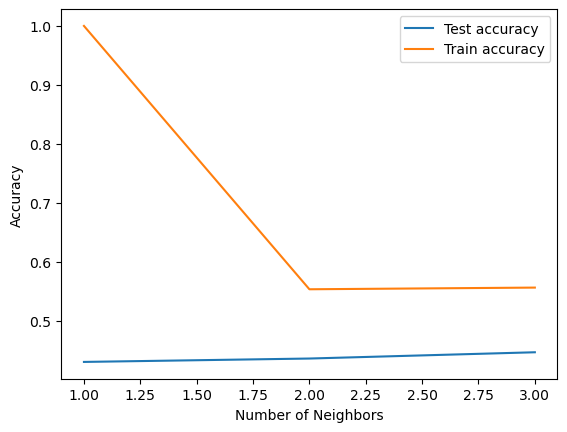

In [15]:
# Plot the relationship between number of neighbors and accuracy
plt.plot(k_range, test_acc, label = 'Test accuracy')
plt.plot(k_range, train_acc, label = 'Train accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show

In [16]:
# Confusion maxtrix based on the last "k" in the sequence (Test data0
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA']

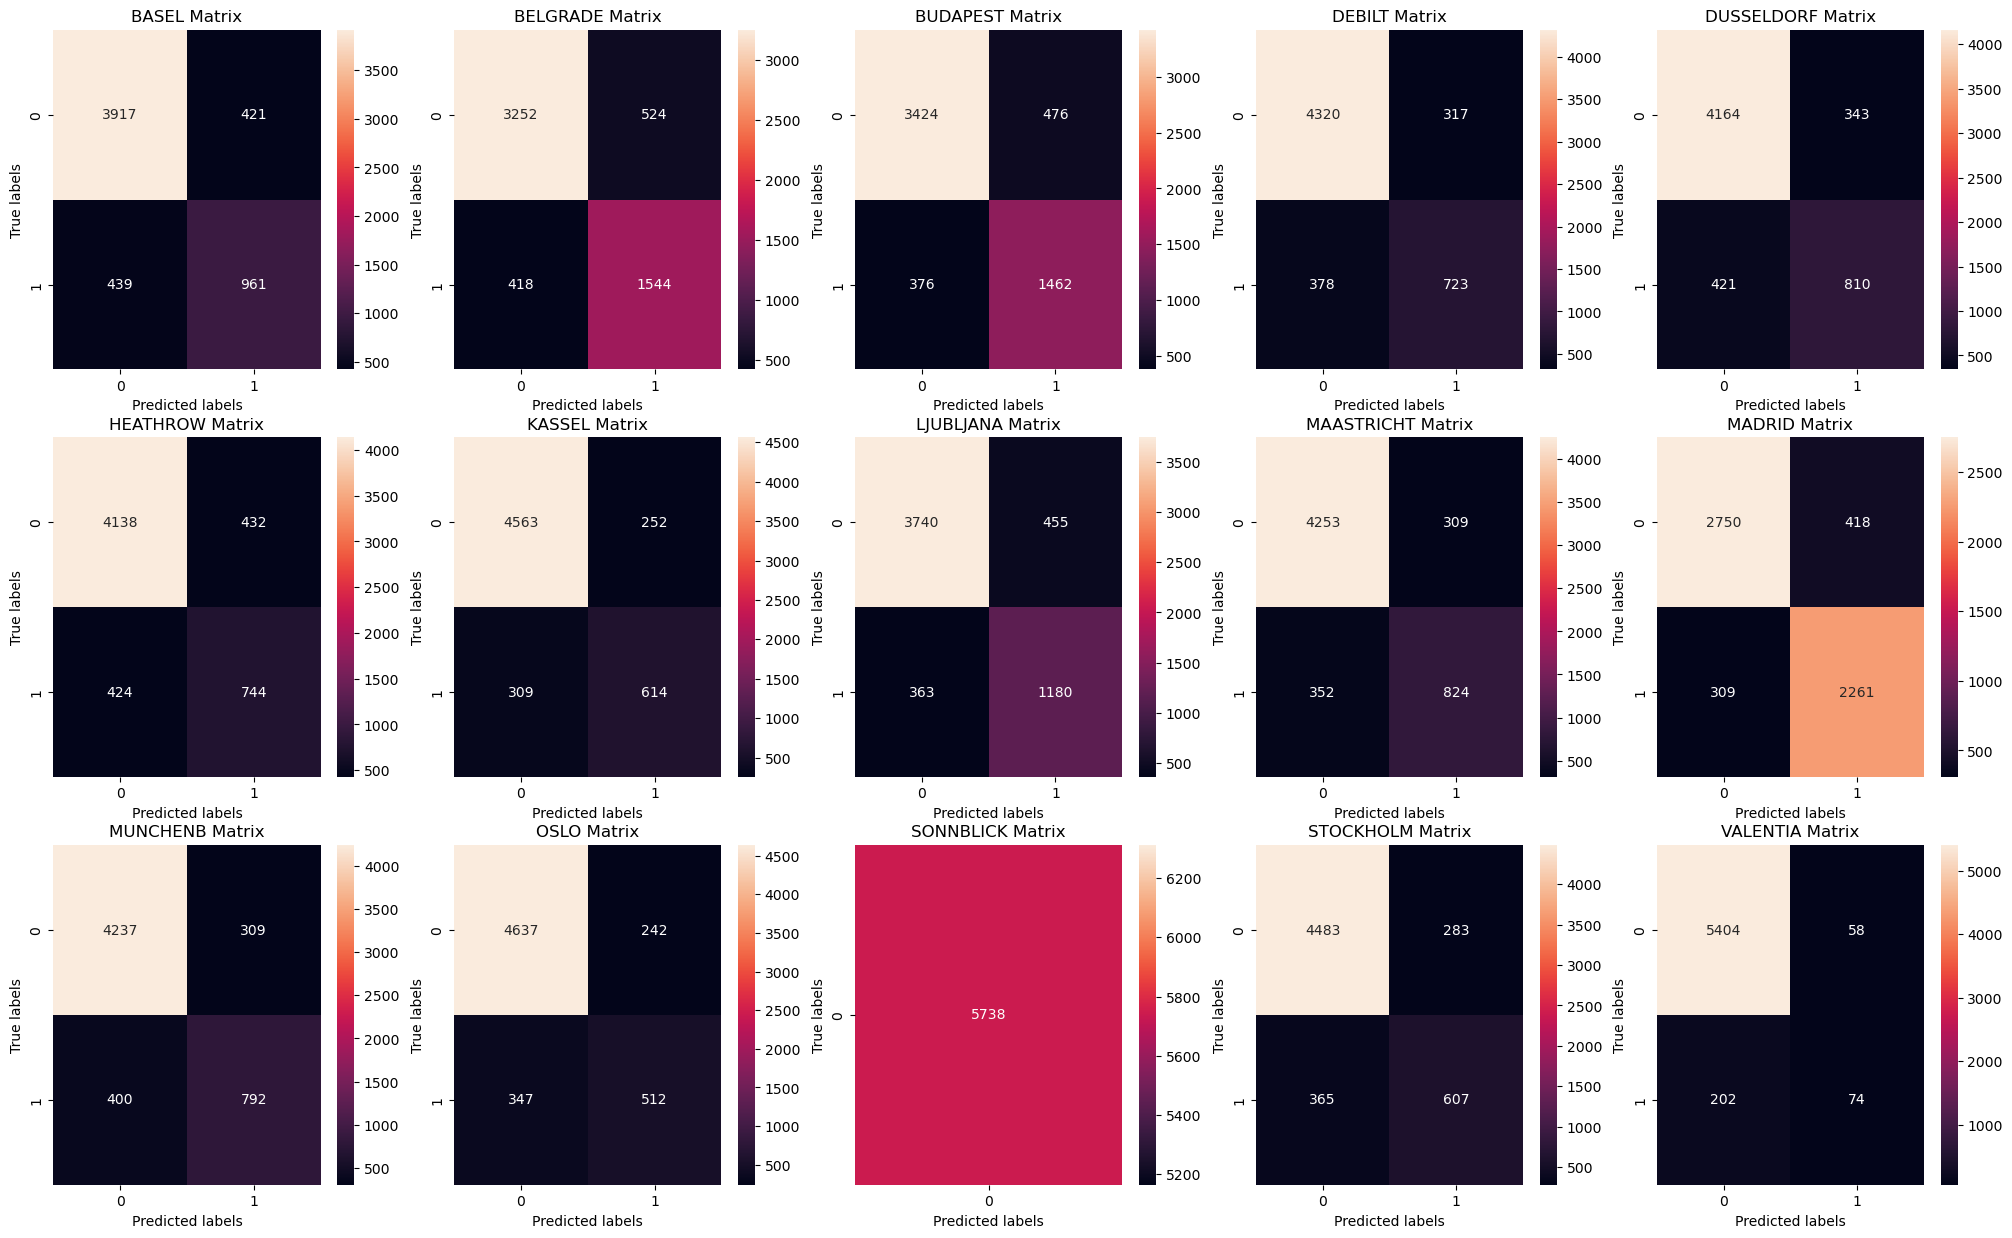

In [17]:
# Confusion Matrix for test data

key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

## Additional work for final project - reaccessing accuracy:

In [18]:
# Evaluate Accuracy Score (CF code):
y_pred_train = knn.predict(X_train)
print(f"Accuracy of training data: {accuracy_score(y_train, y_pred_train)}")
y_pred_test = knn.predict(X_test)
print(f"Accuracy of testing data: {accuracy_score(y_test, y_pred_test)}")

Accuracy of training data: 0.5561817336741808
Accuracy of testing data: 0.44649703729522483


In [19]:
# Calculate accuracy using the score method
accuracy_test = knn.score(X_test, y_test)
accuracy_train = knn.score(X_train, y_train)

print("Test Accuracy:", accuracy_test)
print("Training Accuracy:", accuracy_train)

Test Accuracy: 0.44649703729522483
Training Accuracy: 0.5561817336741808


Calculated Accuracy for BASEL: 0.8501219937260369
Calculated Accuracy for BELGRADE: 0.8358313001045661
Calculated Accuracy for BUDAPEST: 0.8515162077378877
Calculated Accuracy for DEBILT: 0.8788776577204601
Calculated Accuracy for DUSSELDORF: 0.8668525618682468
Calculated Accuracy for HEATHROW: 0.8508191007319623
Calculated Accuracy for KASSEL: 0.9022307424189613
Calculated Accuracy for LJUBLJANA: 0.8574416172882537
Calculated Accuracy for MAASTRICHT: 0.884803067270826
Calculated Accuracy for MADRID: 0.8733008016730568
Calculated Accuracy for MUNCHENB: 0.8764377831997212
Calculated Accuracy for OSLO: 0.8973509933774835
Calculated Accuracy for SONNBLICK: 1.0
Calculated Accuracy for STOCKHOLM: 0.8870686650400836
Calculated Accuracy for VALENTIA: 0.9546880446148484
Average Accuracy across all matrices: 0.8844893691181597


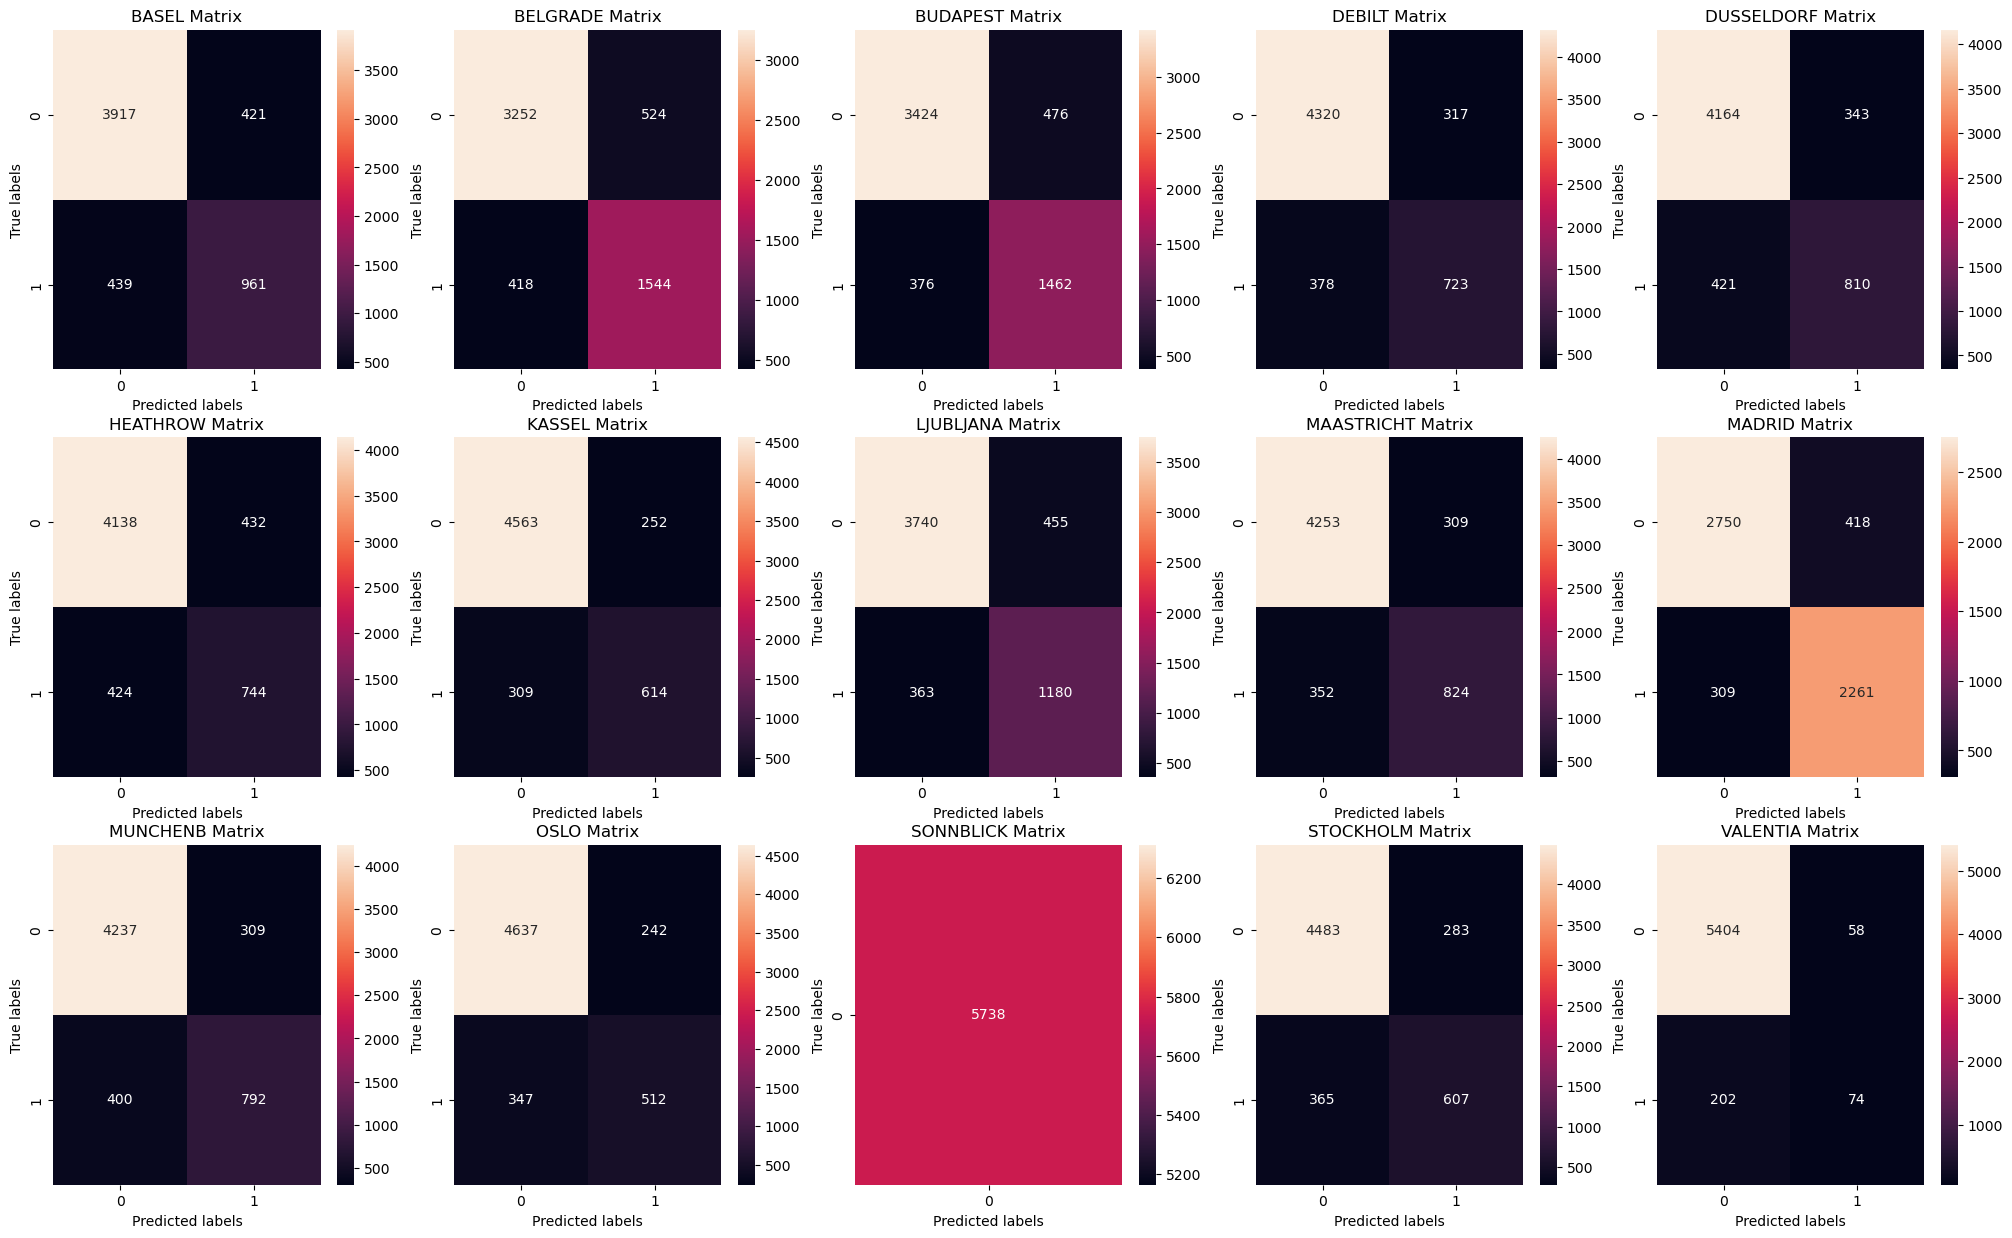

In [20]:
# Confusion Matrix for test data

key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25, 15))
labels = ['pleasant', 'unpleasant']   
count = 0
all_accuracies = []  # List to store all accuracy values

for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:, name + key], y_pred[:, count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i, j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i, j])
        
        # Labels, title and ticks
        ax[i, j].set_xlabel('Predicted labels')
        ax[i, j].set_ylabel('True labels')
        ax[i, j].set_title(name + ' Matrix')
        
        # You can use these lines if you want custom tick labels; remove them if not needed
        # ax[i, j].xaxis.set_ticklabels(labels)
        # ax[i, j].yaxis.set_ticklabels(labels)
        
        count += 1
        
        # Handle different shapes of confusion matrix
        if cm.shape == (2, 2):  # Standard case with TP, TN, FP, FN
            TN, FP, FN, TP = cm.ravel()
        elif cm.shape == (1, 1):  # Only TP or TN, but no other elements
            TP = cm[0, 0]
            TN = FP = FN = 0
        elif cm.shape == (1, 2):  # Only TP and FP
            TP = cm[0, 0]
            FP = cm[0, 1]
            TN = FN = 0
        elif cm.shape == (2, 1):  # Only TN and FN
            TN = cm[0, 0]
            FN = cm[1, 0]
            TP = FP = 0
        
        # Calculate accuracy
        accuracy = (TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) > 0 else 0
        all_accuracies.append(accuracy)  # Store the accuracy

        print(f"Calculated Accuracy for {name}:", accuracy)

# Calculate and print the average accuracy across all matrices
average_accuracy = sum(all_accuracies) / len(all_accuracies) if all_accuracies else 0
print(f"Average Accuracy across all matrices: {average_accuracy}")

Calculated Accuracy for BASEL: 0.9238322100859865
Calculated Accuracy for BELGRADE: 0.9119800139437602
Calculated Accuracy for BUDAPEST: 0.9195909830350918
Calculated Accuracy for DEBILT: 0.9413781082965373
Calculated Accuracy for DUSSELDORF: 0.9342900302114804
Calculated Accuracy for HEATHROW: 0.9273181501278178
Calculated Accuracy for KASSEL: 0.9488728793864746
Calculated Accuracy for LJUBLJANA: 0.9262142691145713
Calculated Accuracy for MAASTRICHT: 0.9426562863118755
Calculated Accuracy for MADRID: 0.9295259121543109
Calculated Accuracy for MUNCHENB: 0.9339414362072972
Calculated Accuracy for OSLO: 0.9478270973739251
Calculated Accuracy for SONNBLICK: 1.0
Calculated Accuracy for STOCKHOLM: 0.9464327213571927
Calculated Accuracy for VALENTIA: 0.9696142226353707
Average Accuracy across all matrices: 0.9402316213494462


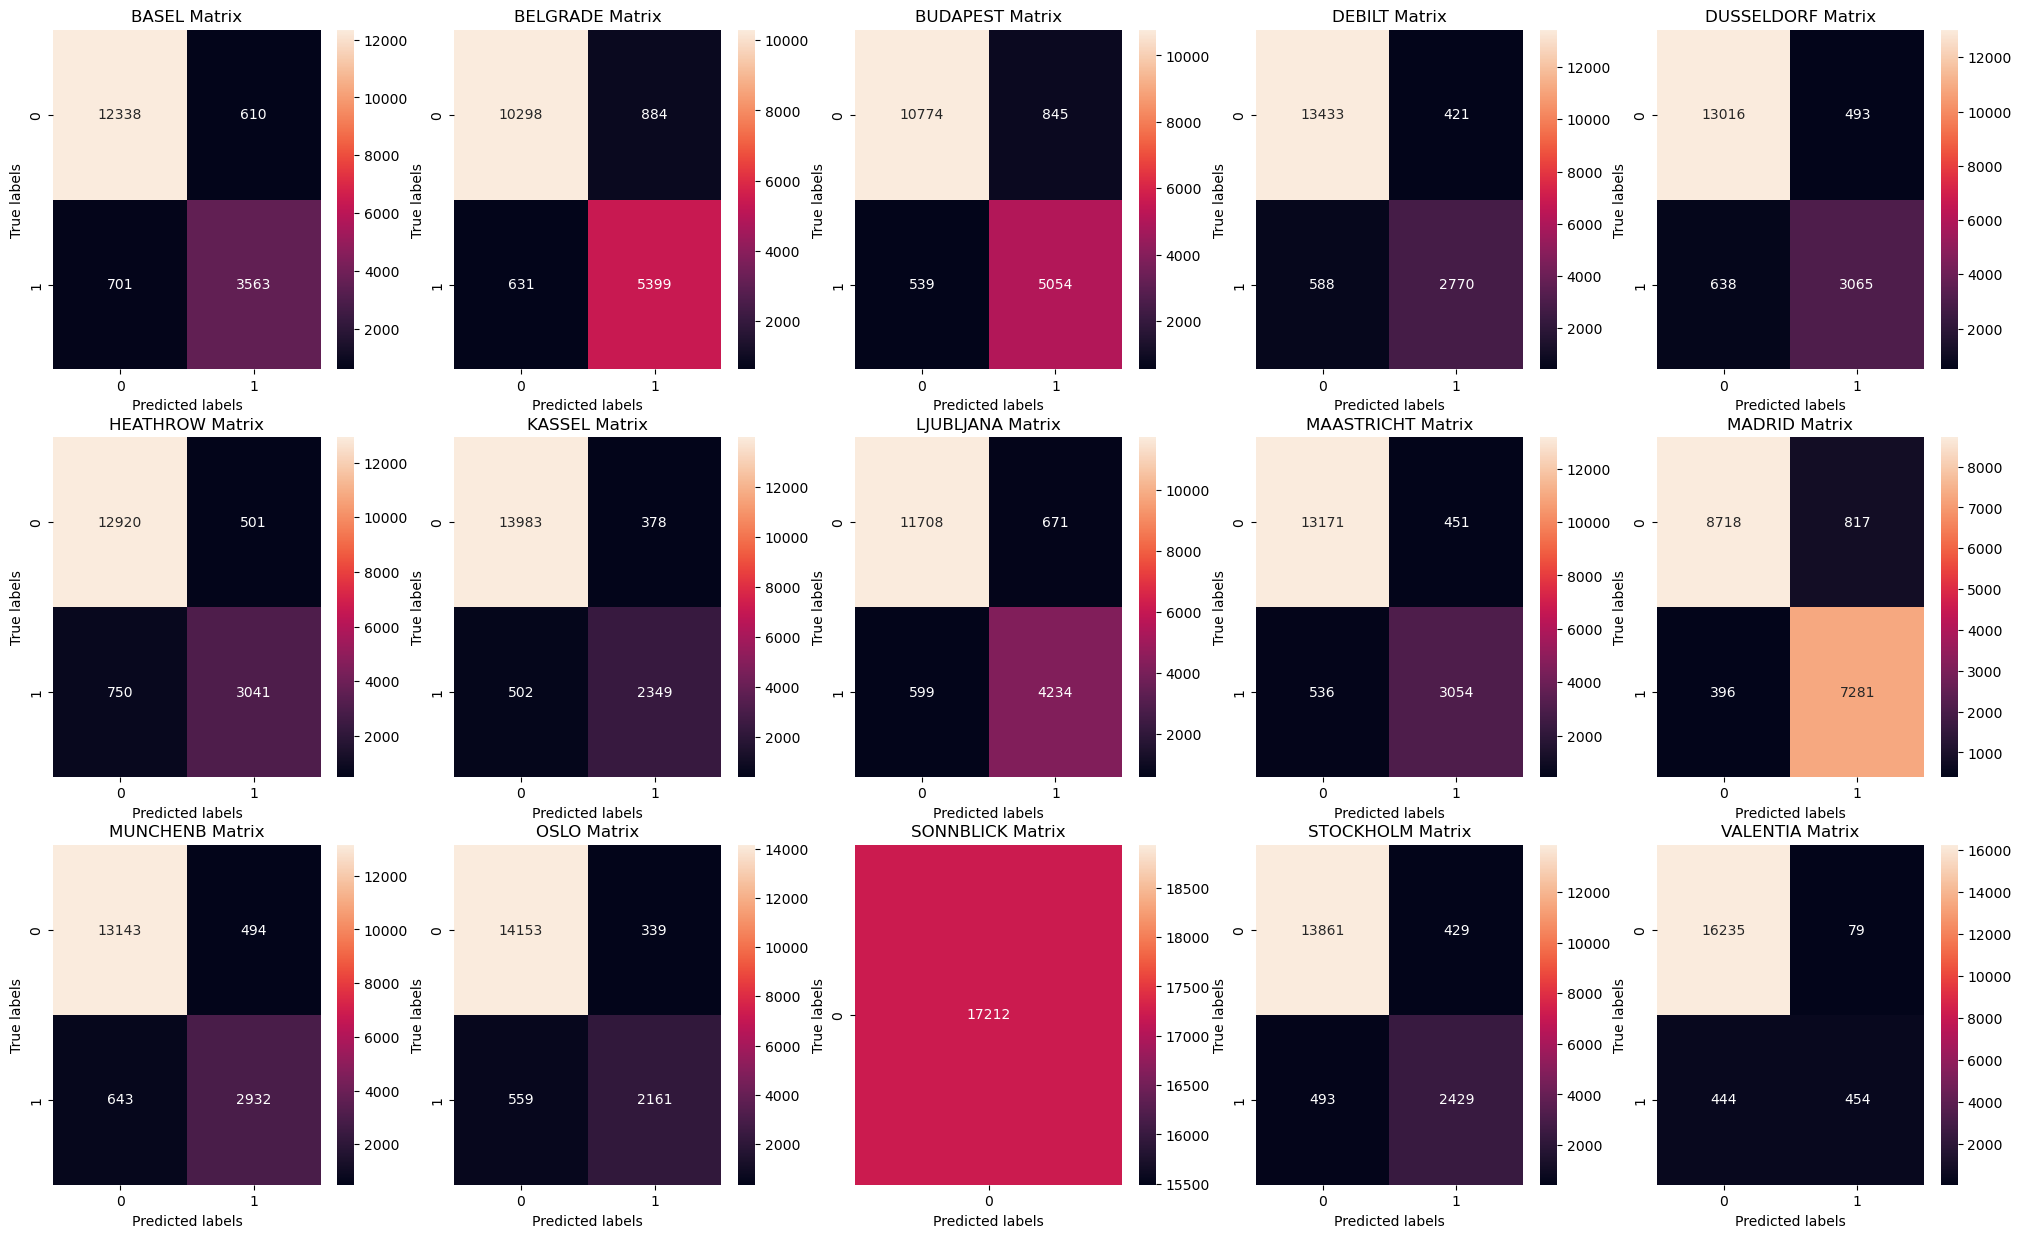

In [21]:
# Confusion Matrix for train data

key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25, 15))
labels = ['pleasant', 'unpleasant']   
count = 0
all_accuracies = []  # List to store all accuracy values

for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:, name + key], y_pred_train[:, count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i, j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i, j])
        
        # Labels, title and ticks
        ax[i, j].set_xlabel('Predicted labels')
        ax[i, j].set_ylabel('True labels')
        ax[i, j].set_title(name + ' Matrix')
        
        # You can use these lines if you want custom tick labels; remove them if not needed
        # ax[i, j].xaxis.set_ticklabels(labels)
        # ax[i, j].yaxis.set_ticklabels(labels)
        
        count += 1
        
        # Handle different shapes of confusion matrix
        if cm.shape == (2, 2):  # Standard case with TP, TN, FP, FN
            TN, FP, FN, TP = cm.ravel()
        elif cm.shape == (1, 1):  # Only TP or TN, but no other elements
            TP = cm[0, 0]
            TN = FP = FN = 0
        elif cm.shape == (1, 2):  # Only TP and FP
            TP = cm[0, 0]
            FP = cm[0, 1]
            TN = FN = 0
        elif cm.shape == (2, 1):  # Only TN and FN
            TN = cm[0, 0]
            FN = cm[1, 0]
            TP = FP = 0
        
        # Calculate accuracy
        accuracy = (TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) > 0 else 0
        all_accuracies.append(accuracy)  # Store the accuracy

        print(f"Calculated Accuracy for {name}:", accuracy)

# Calculate and print the average accuracy across all matrices
average_accuracy = sum(all_accuracies) / len(all_accuracies) if all_accuracies else 0
print(f"Average Accuracy across all matrices: {average_accuracy}")

accuracy scores from confusion matrices extremely different to other code...

In [24]:
# Trialling something else - calculate the precision

from sklearn.metrics import precision_score

# For the training set
y_pred_train = knn.predict(X_train)
precision_train = precision_score(y_train, y_pred_train, average='macro')  # Use 'binary' for binary classification
print("Precision on training data:", precision_train)

# For the testing set
y_pred_test = knn.predict(X_test)
precision_test = precision_score(y_test, y_pred_test, average='macro')  # Use 'binary' for binary classification
print("Precision on testing data:", precision_test)

C:\Users\kyles\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision on training data: 0.8048486287843164
Precision on testing data: 0.6554237299389852


C:\Users\kyles\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Something strange appears to be occuring with the accuracy score calculations. I feel it is best to add code to the other ML agorithms to assess the accuracy using the confusion matrices.